In [1]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
from scipy.constants import h,c,k

In [2]:
hdu=fits.open('/home/soumadip/Downloads/FIRAS_DESTRIPED_SKY_SPECTRA_HRES.FITS')
hdu.info()
data=hdu[1].data
data.columns

Filename: /home/soumadip/Downloads/FIRAS_DESTRIPED_SKY_SPECTRA_HRES.FITS
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      63   ()      
  1                1 BinTableHDU     44   5964R x 6C   [1J, 1E, 1E, 1E, 1I, 182E]   


ColDefs(
    name = 'PIXEL'; format = '1J'
    name = 'GAL_LON'; format = '1E'; unit = 'deg'
    name = 'GAL_LAT'; format = '1E'; unit = 'deg'
    name = 'WEIGHT'; format = '1E'
    name = 'STR_USED'; format = '1I'
    name = 'SPECTRUM'; format = '182E'; unit = 'MJy/sr'; dim = '(182)'
)

In [3]:
c_cms=100*c
from scipy.optimize import curve_fit
def Intensity(wave_num,T):
    return 2*np.pi*h*(wave_num)**3*c_cms**2/(np.exp(h*c_cms*(wave_num)/(k*T))-1)*1e13
    '''
    h = planck constant
    k = boltzmann constant
    c = speed of light in vacuum
    T = temperature of blackbody
    wave_num = wave number of the radiation (1/wavelength)
    '''

In [4]:
# 1st frequency is 68.020812 Ghz
freq_0=68.020812*1e9
freq_interval=13.604162*1e9
#wave number is freq/c. there are 43 total values measured with this interval

wave_number=[]
for i in range(43):
    freq_flag=freq_0+i*freq_interval
    wave_number.append(freq_flag/c_cms)
wave_number=np.array(wave_number)

In [6]:
longtitude=[]
for i in data['GAL_LON']:
    if i >= 180:
        longtitude.append(i-360)
    else:
        longtitude.append(i)
lattitude=data['GAL_LAT']
lattitude_rad=np.pi*data['GAL_LAT']/180
longtitude_rad=np.pi*np.array(longtitude)/180


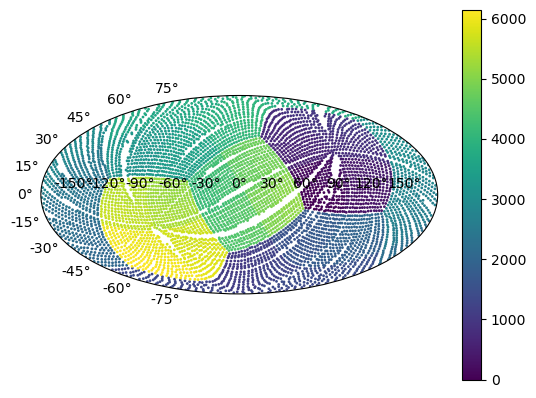

In [7]:
plt.figure()
plt.subplot(111,projection='aitoff')
#plt.scatter(longtitude_rad,lattitude_rad,c=Pixel_data['Temperature'],cmap='plasma',norm=LogNorm(vmax=np.nanmax(Pixel_data['Temperature'])))
plt.scatter(longtitude_rad,lattitude_rad,s=1,c=data['PIXEL'])
plt.colorbar()